In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


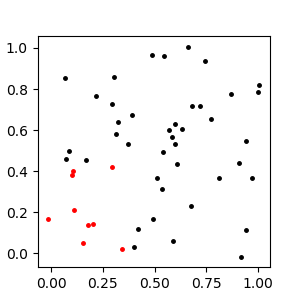

IndexError: too many indices for array

In [23]:
%matplotlib notebook

n_animals = 50
n_steps = 20
vmin = 0.01
vmax = 0.05
#trap_size = 0.4 # All critters with x<this and y<this will be considred "captured"
#trap_size2 = 1

# Capture
#SIDE
color_side = np.where(np.logical_and(x<0.4 , y<0.4), 1, 0) # All captured are color1, all free ones are color0
n_marked = np.sum(color_side)
estimation = np.zeros(n_steps) #so at every point we remember what the ecologist would have guessed was N

#MIDDLE
color_mid = np.where(np.logical_and((x>0.3, x<0.7),(y>0.3, y<0.7)), 2, 0) # All captured are color2, all free ones are color0
n_marked2 = np.sum(color_mid)
estimation2 = np.zeros(n_steps) #so at every point we remember what the ecologist would have guessed was N

# Plotting
fig = plt.figure(figsize=(3,3))
ax = plt.subplot(111)
plt.xlim((0,1));
plt.ylim((0,1));
fig.show()
fig.canvas.draw()

for u in range(n_steps):
    x = np.random.uniform(size=n_animals)
    y = np.random.uniform(size=n_animals)
    vx = np.random.uniform(size=n_animals,low=vmin,high=vmax) * (2*np.random.randint(size=n_animals, low = 0, high = 2) - 1)  #This formula is how we get a random vector of 1 and -1 aka making 0 into -1
    vy = np.random.uniform(size=n_animals,low=vmin,high=vmax) * (2*np.random.randint(size=n_animals, low = 0, high = 2) - 1)
    for t in range(n_steps):
        # Moving elks around
        x += vx
        y += vy

        vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
        vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
        
        # Recapture
        n_recaptured_total = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recaptured_marked = np.sum(np.logical_and(x<trap_size, y<trap_size)*color_side) # Condition1 AND cond2 AND color==1
        estimation[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator
        
        n_recaptured_total2 = np.sum(np.logical_and(x<trap_size, y<trap_size))
        n_recaptured_marked2 = np.sum(np.logical_and(x<trap_size, y<trap_size)*color_mid) # Condition1 AND cond2 AND color==2
        estimation2[t] = (n_marked+1)/(n_recaptured_marked+1)*(n_recaptured_total)-1 # Chapman estimator


        ax.clear()
        plt.plot(x[color_side==0], y[color_side==0], 'k.',markersize=5);
        plt.plot(x[color_side==1], y[color_side==1], 'r.',markersize=5)
        
        plt.plot(x[color_mid==0], y[color_mid==0], 'k.',markersize=5);
        plt.plot(x[color_mid==1], y[color_mid==1], 'r.',markersize=5)
        
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw() # <--------------- The main command to make it move
        #time.sleep(0.5)
    
plt.figure()
plt.plot(estimation)
plt.plot(estimation2)
plt.xlabel('Time')
plt.ylabel('Estimate of the number of turtles')

# This did not work, but maybe it could eventually.

I couldn't get my center placement trap to work! I am curious about how others did it, because the only solution I could come up with was to adjust the np.where() statement for a range of x and y values, which warranted an error when I tried to plot it ('too many indices for array'). I tried to google how to fix this, but still had no luck. However, I think this could somehow work if I worked out this kink.

Also, I'm not sure if I needed to include the np.random.uniform() lines in the outermost loop.

The best way to interpret the plot that I strived to produce (but tragically failed) would be to compare the peaks at each time point and determine which plot remained true to the actual n_animals the most frequently, i.e. under- and over-predicted the least. 


For what it's worth, I think that more animals would come in contact with a center trap than a side trap, which would probably increase the accuracy of the prediction. If this actually led to an over-prediction, then a side trap would be better.  